In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
class LogisticNeuron:
    def __init__(self):
        self.w = None
        self.b = None

    def forpass(self, x):
        z = np.sum(x * self.w) + self.b
        return z

    def backpass(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad

    def activation(self, z):
        z = np.clip(z, -100, None)
        a = 1 / (1 + np.exp(-z))
        return a

    def fit(self, x, y, epochs = 100):
        self.w = np.ones(x.shape[1])
        self.b = 0

        for i in range(epochs):
            for x_in, y_in in zip(x, y):
                z = self.forpass(x_in)
                a = self.activation(z)
                err = -(y_in - a)
                w_grad, b_grad = self.backpass(x_in, err)
                self.w -= w_grad
                self.b -= b_grad

    def predict(self, x):
        z = np.array([self.forpass(in_x) for in_x in x])
        a = self.activation(z)
        return a > 0.5

#(주의사항) - 뉴런은 모두 수치형 데이터를 넣어줘야함

#iris 데이터 로지스틱뉴런(단일) 테스트

In [ ]:
df1 = sns.load_dataset('iris')
df1 = df1[(df1['species'] == 'virginica')|(df1['species'] == 'setosa')].reset_index(drop = True)
df1

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,6.7,3.0,5.2,2.3,virginica
96,6.3,2.5,5.0,1.9,virginica
97,6.5,3.0,5.2,2.0,virginica
98,6.2,3.4,5.4,2.3,virginica


In [ ]:
x1 = df1.drop(['species'], axis = 1)
y1 = df1['species']

In [ ]:
y1.replace(['virginica', 'setosa'], [0, 1], inplace = True)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
train_x1, test_x1, train_y1, test_y1 = train_test_split(x1, y1, test_size = 0.3, random_state = 42)
s = StandardScaler()
s.fit(train_x1)
s_train_x1 = s.transform(train_x1)
s_test_x1 = s.transform(test_x1)

In [ ]:
m = LogisticNeuron()
m.fit(s_train_x1, train_y1)

In [ ]:
np.mean(m.predict(s_test_x1) == test_y1)

1.0

#titanic 데이터 로지스틱뉴런(단일) 테스트

In [ ]:
df2 = sns.load_dataset('titanic')
df2.drop(['class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'], axis = 1, inplace = True)
df2.dropna(inplace = True)
df2 = df2.reset_index(drop = True)
df2

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
707,0,3,female,39.0,0,5,29.1250,Q
708,0,2,male,27.0,0,0,13.0000,S
709,1,1,female,19.0,0,0,30.0000,S
710,1,1,male,26.0,0,0,30.0000,C


In [ ]:
df2['sex'].replace(['male', 'female'], [0, 1], inplace = True)
df2['embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace = True)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   sex       712 non-null    int64  
 3   age       712 non-null    float64
 4   sibsp     712 non-null    int64  
 5   parch     712 non-null    int64  
 6   fare      712 non-null    float64
 7   embarked  712 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 44.6 KB


In [ ]:
x2 = df2.drop('survived', axis = 1)
y2 = df2['survived'].values

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
train_x2, test_x2, train_y2, test_y2 = train_test_split(x2, y2, test_size = 0.3, random_state = 42)
ss = StandardScaler()
ss.fit(train_x2)
s_train_x2 = ss.transform(train_x2)
s_test_x2 = ss.transform(test_x2)

In [ ]:
m2 = LogisticNeuron()
m2.fit(s_train_x2, train_y2)

In [ ]:
np.mean(m2.predict(s_test_x2) == test_y2)

0.7102803738317757

In [ ]:
class SingleLayer:
    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []

    def forpass(self, x):
        z = np.sum(x * self.w) + self.b
        return z

    def backpass(self, x, err):
        w_g = x * err
        b_g = 1 * err
        return w_g, b_g

    def activation(self, z):
        z = np.clip(z, -100, None)
        a = 1 / (1 + np.exp(-z))
        return a

    def fit(self, x, y, epochs = 100):
        self.w = np.ones(x.shape[1]) # 가중치 - 피쳐의 갯수만큼 줘야함
        self.b = 0
        for i in range(epochs):
            loss = 0
            n_idx = np.random.permutation(np.arange(len(x)))
            #n_idx = np.random.choice(len(x), size=len(x), replace=False)
            #print(i, n_idx)
            for j in n_idx:
                #print(j, "실행")
                if j >= len(y):
                    continue
                z = self.forpass(x[j])
                a = self.activation(z)
                # 여기 err 부분이 에러뜨는데;;
                err = -(y[j] - a)
                w_g, b_g = self.backpass(x[j], err)
                self.w -= w_g
                self.b -= b_g
                a = np.clip(a, 1e-10, 1 - 1e-10)
                loss += -(y[j] * np.log(a) + (1 - y[j]) * np.log(1 - a))
            self.losses.append(loss / len(y))

    def predict(self, x):
        z = np.array([self.forpass(x_in) for x_in in x])
        return z > 0

    def score(self, x, y):
        return np.mean(self.predict(x) == y)

In [ ]:
s_train_x2.shape, train_y2.shape

((498, 7), (498,))

In [ ]:
m = SingleLayer()
m.fit(s_train_x2, train_y2)
m.score(s_test_x2, test_y2)

0.6588785046728972

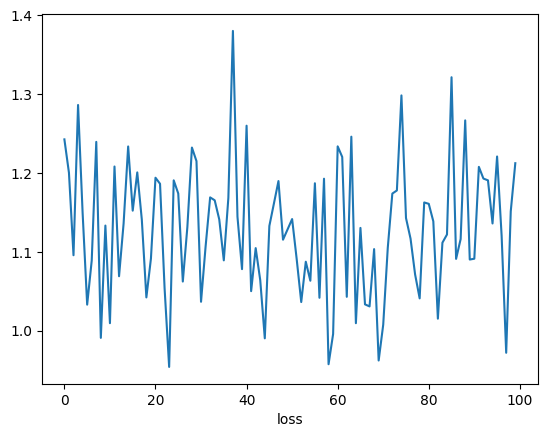

In [ ]:
import matplotlib.pyplot as plt
plt.plot(m.losses)
plt.xlabel('epoch')
plt.xlabel('loss')
plt.show()

In [ ]:
def act_f(z):
    return 1 / (1 + np.exp(-z))

def act_f_d(x):
    return x * (1 - x)

In [ ]:
input_n = 2
h_n = 4
out_n = 1
W0 = 2 * np.random.random((input_n, h_n)) - 1
W1 = 2 * np.random.random((h_n, out_n)) - 1

데이터 준비

In [ ]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

순방향

In [ ]:
# 첫번째 레이어 입력 -> 은닉
in_l = x

# 레이어 1 연산
l_1 = in_l@W0

# 두번째 레이어 은닉 -> 출력
# 2. 은닉층
h_l = act_f(l_1)

# 레이어 2 연산
l_2 = h_l@W1

# 3. 출력층
out_l = act_f(l_2)
print("예측값", out_l)

예측값 [[0.56113333]
 [0.59127818]
 [0.59770119]
 [0.62300585]]


오차

In [ ]:
out_err = out_l - y

오차역전파

In [ ]:
out_err = out_l = y # 출력오차
out_l_d = act_f_d(out_l) * out_err

#2
h_err = out_l_d@W1.T # 은닉오차
h_l_d = act_f_d(h_l)*h_err
#1
W1 -= 0.2 * (h_l.T@out_l_d)
W0 -= 0.2 * (in_l.T@h_l_d)


In [ ]:
h_l.shape, out_l_d.shape

((4, 4), (4, 1))

통합 정리

In [ ]:
# x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# y = np.array([[0], [1], [1], [0]])

# def act_f(z):
#     return 1 / (1 + np.exp(-z))

# def act_f_d(x):
#     return x * (1 - x)

# input_n = 2
# h_n = 4
# out_n = 1

# np.random.seed(5)
# W0 = 2 * np.random.random((input_n, h_n)) - 1
# W1 = 2 * np.random.random((h_n, out_n)) - 1



In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import binary_crossentropy, mean_squared_error
from keras.optimizers import SGD, RMSprop, Adam

In [ ]:
m = Sequential()
m.add(Dense(4, activation = 'sigmoid', input_shape = x.shape[1:])) # l_1
m.add(Dense(1, activation = 'sigmoid')) #l_2
m.summary()
m.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hy = m.fit(x, y, epochs = 100)

In [ ]:
hy.history

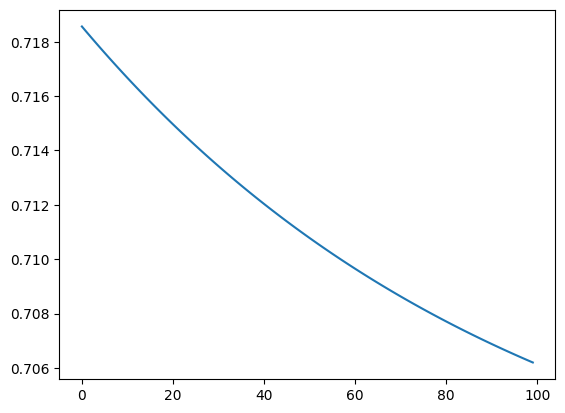

In [ ]:
plt.plot(hy.history['loss'])

In [ ]:
df2 = sns.load_dataset('titanic')
df2.drop(['class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'], axis = 1, inplace = True)
df2.dropna(inplace = True)
df2 = df2.reset_index(drop = True)
df2

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
707,0,3,female,39.0,0,5,29.1250,Q
708,0,2,male,27.0,0,0,13.0000,S
709,1,1,female,19.0,0,0,30.0000,S
710,1,1,male,26.0,0,0,30.0000,C


In [ ]:
df2['sex'].replace(['male', 'female'], [0, 1], inplace = True)
df2['embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace = True)

In [ ]:
x2 = df2.drop('survived', axis = 1)
y2 = df2['survived'].values

In [1]:
m = Sequential()
m.add(Dense(128, activation = 'relu'))#, input_shape = x2.shape[1:]))
m.add(Dense(64, activation = 'relu'))
m.add(Dense(32, activation = 'relu'))
m.add(Dense(16, activation = 'relu'))
m.add(Dense(1, activation = 'sigmoid')) #l_2
#m.summary()
m.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

NameError: ignored

In [ ]:
hy = m.fit(x2, y2, epochs = 1000)

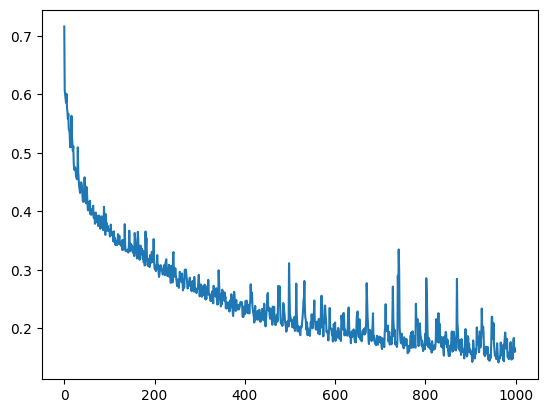

In [ ]:
plt.plot(hy.history['loss'])

In [ ]:
m.predict(x2)

In [ ]:
m.evaluate(x2, y2)

23/23 [==============================] - 0s 2ms/step - loss: 0.1455 - accuracy: 0.9410


[0.14546142518520355, 0.9410112500190735]